## **Importação das bibliotecas e dados (AEP e Duas Unas)**

In [166]:
# %pip install ipykernel --break-system-packages
# %pip install scikit-learn --break-system-packages
# %pip install matplotlib --break-system-packages
# %pip install keras --break-system-packages
# %pip install tensorflow --break-system-packages
# %pip install pandas --break-system-packages
# %pip install plotly --break-system-packages
# %pip install seaborn --break-system-packages
# %pip install nbformat --break-system-packages
# %pip install keras --break-system-packages



In [167]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.initializers import GlorotUniform    #Inicializador de pesos
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf #Biblioteca para machine learning


In [168]:

base_path = './dataset/'

# carregando arquivo CSV
time_base = 'days'  # Escolha do tipo de agrupamento
duas_unas_dataset = f'{base_path}duas_unas/{time_base}/grouped_1_{time_base}.csv'  # Definição do caminho do diretório do dataset
print(len(duas_unas_dataset))
validation_interval = 97  # Definição da parcela dos dados que serão retiradas do treinamento/teste para validação
time_step = 1  # Number of previous time steps to consider
output_steps = 14  # Number of future steps to predict

# transformando CSV em DataFrame
duas_unas_df = pd.read_csv(duas_unas_dataset)  # Transformação em dataset

duas_unas_validation = duas_unas_df.tail(validation_interval)  # Criação do dataset de validação

indices_to_validate = duas_unas_df.index[-validation_interval:].tolist()  # Obtenção dos índices dos dadoss de validação
duas_unas_df = duas_unas_df.drop(indices_to_validate).reset_index(drop=True)  # Retirada dos dados de validação do dataset original de treino/teste

duas_unas_df['timestamp'] = pd.to_datetime(duas_unas_df['timestamp'])  # Transformação dos dados da coluna 'timestamp' no formato datetime. Ela lida com vários formatos de data/hora e tenta interpretá-los de forma inteligente.
duas_unas_validation['timestamp'] = pd.to_datetime(duas_unas_validation['timestamp'])  # Idem da ação da linha de cima.

duas_unas_df['index'] = range(len(duas_unas_df))  # Criação da coluna 'index' em que os valores vão de zero ao tamanho total do daframe
duas_unas_validation['index'] = indices_to_validate  # Idem da acima da linha acima
print(indices_to_validate)
duas_unas_df['kwh'] = duas_unas_df['kWh fornecido']  # Criação da coluna 'kwh' que copia os dados da coluna 'kWh fornecido'
duas_unas_validation['kwh'] = duas_unas_validation['kWh fornecido']  # Idem da acima da linha acima

duas_unas_df.drop(columns=['timestamp'], inplace=True)  # Remoção da coluna 'timestamp', inclusive no dataframe original
duas_unas_validation.drop(columns=['timestamp'], inplace=True)  # Idem da acima da linha acima

duas_unas_df.drop(columns=['kWh fornecido'], inplace=True)  # Remoção da coluna 'kWh fornecido', inclusive no dataframe original
duas_unas_validation.drop(columns=['kWh fornecido'], inplace=True)  # Idem da acima da linha acima

X = duas_unas_df['index'].values.reshape(-1,1)  # Cria o array X com os índices do dataframe duas_unas_df
y = duas_unas_df['kwh'].values  # Cria o array y com os dados de energia de duas_unas_df
#print(y)
X_validation = duas_unas_validation['index'].values.reshape(-1,1)  # Cria o array X_validation com os índices do dataframe duas_unas_validation
y_validation = duas_unas_validation['kwh'].values  # Cria o array y com os dados de energia de duas_unas_validation
#print(X_validation)

43
[214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310]


In [169]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# regr = MLPRegressor(hidden_layer_sizes=(50,50,50), max_iter=200).fit(X_train, y_train)

# y_pred = regr.predict(X_test)

# from sklearn.metrics import mean_squared_error

# rms = mean_squared_error(y_test, y_pred, squared=False)

# plt.figure(figsize=(8, 6))
# plt.scatter(X_test, y_test, color="blue", label="Valores Reais")
# plt.scatter(X_test, y_pred, color="red", label="Previsões", alpha=0.6)
# plt.title(f"Teste do MLPRegressor (RMSE: {rms:.2f})")
# plt.xlabel("Horas (X)")
# plt.ylabel("Previsão (y)")
# plt.legend()
# plt.show()

In [170]:
# print(X_validation)
# y_pred_validation = regr.predict(X_validation)

# plt.figure(figsize=(8, 6))
# plt.scatter(X_validation, y_validation, color="blue", label="Valores Reais")
# plt.scatter(X_validation, y_pred_validation, color="red", label="Previsões", alpha=0.6)
# plt.title(f"Hora da Verdade")
# plt.xlabel("Hora (X)")
# plt.ylabel("Consumo (y)")
# plt.legend()
# plt.show()

In [171]:
# pirapama_dataset = f'{base_path}outras_unidades/pirapama/agrupado_hora_Pirapama_2021.csv'
# # transformando CSV em DataFrame
# pirapama_df = pd.read_csv(pirapama_dataset)

# pirapama_df['Data'] = pd.to_datetime(pirapama_df['Data'])

# pirapama_df['index'] = range(len(pirapama_df))

# pirapama_df['kwh'] = pirapama_df['kWh fornecido'] 

# pirapama_df.drop(columns=['Data'], inplace=True)

# pirapama_df.drop(columns=['kWh fornecido'], inplace=True)

# X_pirapama = pirapama_df['index'].values.reshape(-1,1)
# y_pirapama = pirapama_df['kwh'].values

# y_pred = regr.predict(X_pirapama)

# plt.figure(figsize=(8, 6))
# plt.plot(X_pirapama, y_pirapama, color="blue", label="Valores Reais")
# plt.plot(X_pirapama, y_pred, color="red", label="Valores Previstos")
# plt.title(f"Hora da Verdade")
# plt.xlabel("Hora (X)")
# plt.ylabel("Consumo (y)")
# plt.legend()
# plt.show()

c:\Users\Renan Torres\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100000
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 690ms/step - loss: 0.9070 - val_loss: 0.8934
Epoch 2/100000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.9026 - val_loss: 0.8880
Epoch 3/100000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.8999 - val_loss: 0.8826
Epoch 4/100000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.8961 - val_loss: 0.8771
Epoch 5/100000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.8898 - val_loss: 0.8715
Epoch 6/100000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.8800 - val_loss: 0.8657
Epoch 7/100000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.8804 - val_loss: 0.8597
Epoch 8/100000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.8671 - val_loss: 0.8536
Epoch 9/100000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.8674 - val_loss: 0.8472
Epoch 10/100000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.8546 - val_loss: 0.8404
Epoch 11/100000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.8544 - val_loss: 0.8334
Epoch 12/100000
4/4 ━━━━━━━━━━━━━━━━━━━

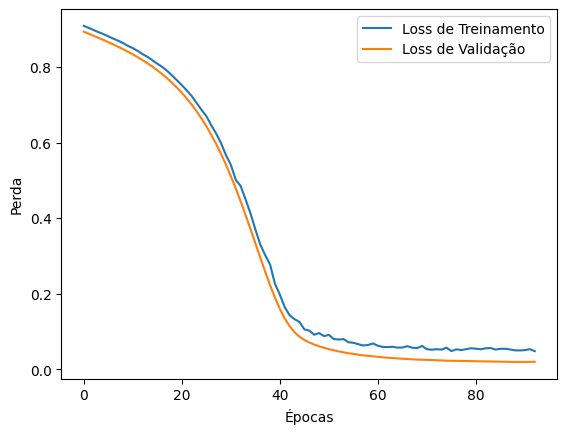

In [172]:


scaler = MinMaxScaler(feature_range=(0, 1))  # Padronização dos dados
scaled_kwh = scaler.fit_transform(duas_unas_df['kwh'].values.reshape(-1, 1))  # padronização de duas_unas_df

scaled_kwh_validation = scaler.fit_transform(duas_unas_validation['kwh'].values.reshape(-1,1))  # padronização de duas_unas_validacao

def create_dataset(data, time_step, output_steps):  # Função para construção do dataset
    X, y = [], []  # Criação das listas
    for i in range(len(data) - time_step - output_steps + 1):  # Loop
        X.append(data[i:(i + time_step), 0])  # Construção do dataset 
        y.append(data[(i + time_step):(i + time_step + output_steps), 0])
    return np.array(X), np.array(y)

# Create the dataset
X, y = create_dataset(scaled_kwh, time_step, output_steps)

X_validation, y_validation = create_dataset(scaled_kwh_validation, time_step, output_steps)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)



# Build the LSTM model
model = Sequential()
model.add(LSTM(20, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(20, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(20, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(output_steps)) 

learning_rate = 0.0005
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='mean_squared_error')

#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.02, patience=2, verbose=0, mode='auto')
history = model.fit(X_train, y_train, epochs=100000, batch_size=30, validation_split=.2, callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=2, patience=3))

# Train the model
#history = model.fit(X_train, y_train, epochs=1000, batch_size=4, verbose=1, callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, verbose=1))

# Plotar as perdas de treinamento e validação
plt.plot(history.history['loss'], label='Loss de Treinamento')
plt.plot(history.history['val_loss'], label='Loss de Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()

In [173]:
def avaliacao_multistep(janela_real, janela_prevista):
    
    mae_med = 0
    mse_med = 0
    rmse_med = 0
    mape_med = 0
    acuracia_med = 0
    # Converte as listas para arrays NumPy
    #janela_real = np.array(janela_real)
    #janela_prevista = np.array(janela_prevista)
    print(len(janela_real[0]))
    
    for j in range(len(janela_prevista)):
        if len(janela_real) != len(janela_prevista):
            raise ValueError("As janelas reais e previstas devem ter o mesmo comprimento.")

        else:
        #r2 =  round(r2_score(janela_real, janela_prevista), 2)   # Relacionado à regressão linear dos valores verdadeiros. É calculado com base no erro quadrático residual e erro total. O valor pode ser interpretado como a proporção dos valores previstos que estão na linha criada pela regressão.
        #print("R^2 Score of LSTM model = ",r2)
        #print(" ")

            mae = round(mean_absolute_error(janela_real[j], janela_prevista[j]), 3) # Arredondamento com três casas decimais
            print("MAE(Erro absoluto médio) Score of LSTM model = ",mae)
            print(" ")

            mse = round(mean_squared_error(janela_real[j], janela_prevista[j]), 3)
            print("MSE(Erro quadrático médio) Score of LSTM model = ",mse)
            print(" ")
            
            rmse = round(np.sqrt(mse), 3)
            print("RMSE(Raiz do erro quadrático médio) Score of LSTM model = ",rmse)
            print(" ")

            mape = round(mean_absolute_percentage_error(janela_real[j], janela_prevista[j]), 2)
            print("MAPE(Erro percentual médio absoluto) Score of LSTM model = ",mape)
            print(" ")
            
            ### Cálculo da ACURÁCIA ###
            
            # Calcula a diferença percentual
            diferencas_percentuais = np.abs((np.array(janela_real[j]) - np.array(janela_prevista[j])) / np.array(janela_real[j]))

            # Conta quantas diferenças percentuais estão dentro da tolerância
            acertos = np.sum(diferencas_percentuais <= 0.05) #0.05 é a tolerância

            # Calcula a acurácia
            acuracia = acertos / len(janela_real[0])   
            acuracia = round(100 * acuracia, 2)
            
            print("Accuracy Score of LSTM model = ",acuracia)
            mae_med += mae
            mse_med += mse
            rmse_med += rmse
            mape_med += mape
            acuracia_med += acuracia
            
    mae_med /=(len(janela_prevista))
    mse_med /=(len(janela_prevista))
    rmse_med /=(len(janela_prevista))
    mape_med /=(len(janela_prevista))
    acuracia_med /=(len(janela_prevista))
    
    return mae_med, mse_med, rmse_med, mape_med, acuracia_med

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 566ms/step
83 83 1
[214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296]


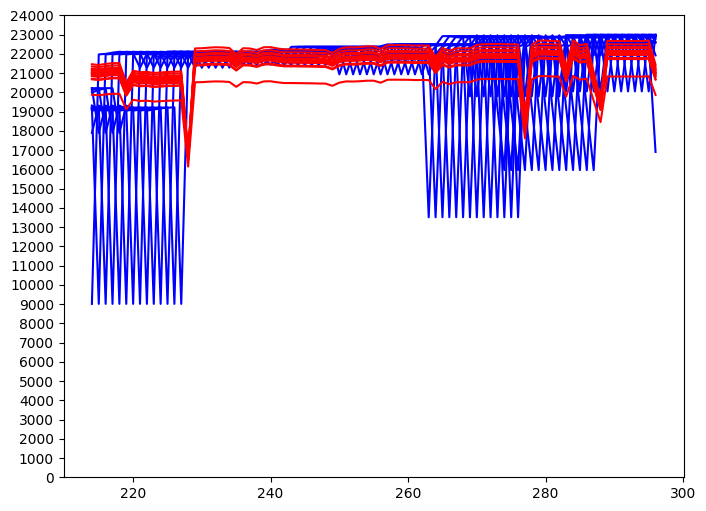

In [174]:
y_pred = model.predict(X_validation)
print(len(X_validation), len(y_pred), len(X_validation[0]))
y_pred_rescaled = scaler.inverse_transform(y_pred)

y_test_rescaled = scaler.inverse_transform(y_validation)
indices_to_validate = indices_to_validate[:len(y_pred_rescaled)]
#indices_to_validate = indices_to_validate[:validation_interval]
print(indices_to_validate)

plt.figure(figsize=(8,6))
plt.plot(indices_to_validate, y_test_rescaled, label="Original", color='blue')
plt.plot(indices_to_validate, y_pred_rescaled, label="Predição", color='red')
plt.yticks(np.arange(0,25000,step=1000))
plt.show()


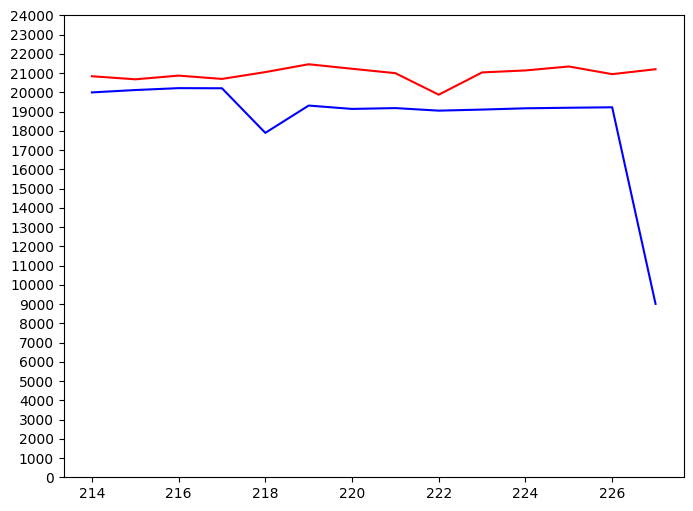

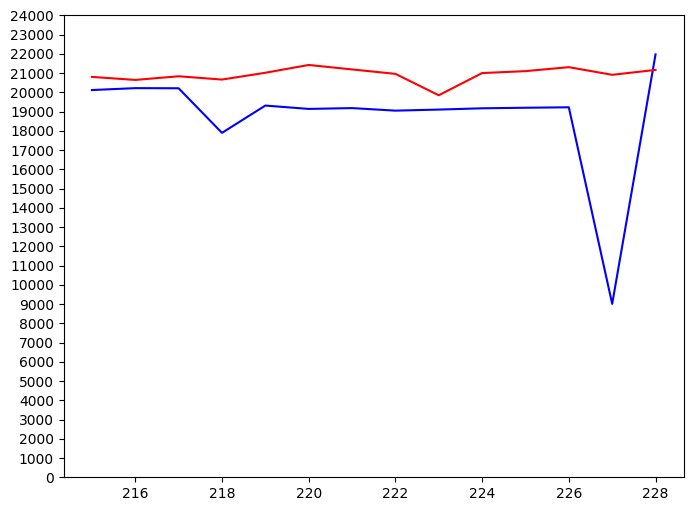

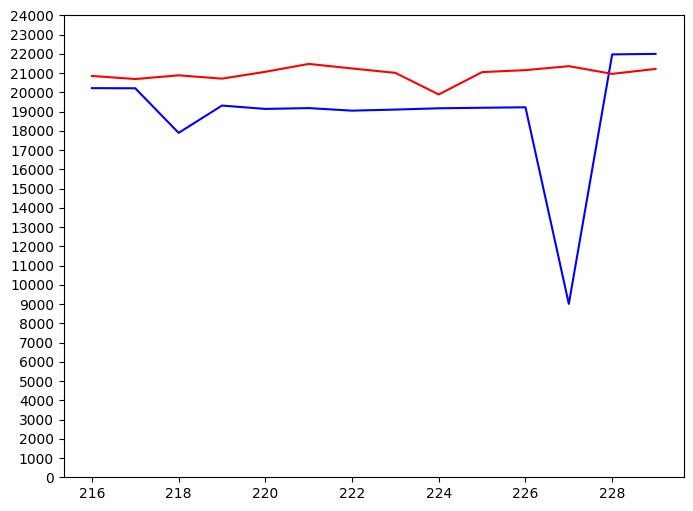

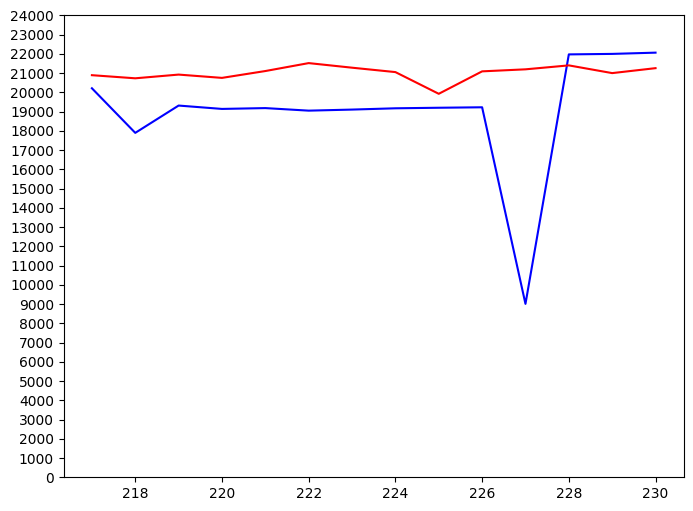

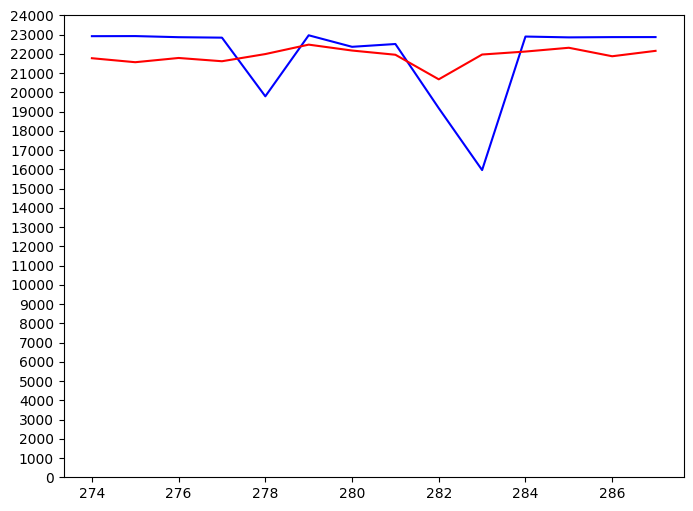

In [175]:
plt.figure(figsize=(8,6))
plt.plot(indices_to_validate[0:output_steps], y_test_rescaled[0], label="Original", color='blue')
plt.plot(indices_to_validate[0:output_steps], y_pred_rescaled[0], label="Predição", color='red')
plt.yticks(np.arange(0,25000,step=1000))
plt.show()

plt.figure(figsize=(8,6))
plt.plot(indices_to_validate[1:1+output_steps], y_test_rescaled[1], label="Original", color='blue')
plt.plot(indices_to_validate[1:1+output_steps], y_pred_rescaled[1], label="Predição", color='red')
plt.yticks(np.arange(0,25000,step=1000))
plt.show()


plt.figure(figsize=(8,6))
plt.plot(indices_to_validate[2:2+output_steps], y_test_rescaled[2], label="Original", color='blue')
plt.plot(indices_to_validate[2:2+output_steps], y_pred_rescaled[2], label="Predição", color='red')
plt.yticks(np.arange(0,25000,step=1000))
plt.show()


plt.figure(figsize=(8,6))
plt.plot(indices_to_validate[3:3+output_steps], y_test_rescaled[3], label="Original", color='blue')
plt.plot(indices_to_validate[3:3+output_steps], y_pred_rescaled[3], label="Predição", color='red')
plt.yticks(np.arange(0,25000,step=1000))
plt.show()


plt.figure(figsize=(8,6))
plt.plot(indices_to_validate[60:60+output_steps], y_test_rescaled[64], label="Original", color='blue')
plt.plot(indices_to_validate[60:60+output_steps], y_pred_rescaled[64], label="Predição", color='red')
plt.yticks(np.arange(0,25000,step=1000))
plt.show()

In [176]:
avaliacao_multistep(y_test_rescaled,y_pred_rescaled)

14
MAE(Erro absoluto médio) Score of LSTM model =  2322.661
 
MSE(Erro quadrático médio) Score of LSTM model =  13451062.037
 
RMSE(Raiz do erro quadrático médio) Score of LSTM model =  3667.569
 
MAPE(Erro percentual médio absoluto) Score of LSTM model =  0.17
 
Accuracy Score of LSTM model =  35.71
MAE(Erro absoluto médio) Score of LSTM model =  2262.421
 
MSE(Erro quadrático médio) Score of LSTM model =  12759042.593
 
RMSE(Raiz do erro quadrático médio) Score of LSTM model =  3571.98
 
MAPE(Erro percentual médio absoluto) Score of LSTM model =  0.17
 
Accuracy Score of LSTM model =  35.71
MAE(Erro absoluto médio) Score of LSTM model =  2318.869
 
MSE(Erro quadrático médio) Score of LSTM model =  13623537.457
 
RMSE(Raiz do erro quadrático médio) Score of LSTM model =  3691.008
 
MAPE(Erro percentual médio absoluto) Score of LSTM model =  0.17
 
Accuracy Score of LSTM model =  35.71
MAE(Erro absoluto médio) Score of LSTM model =  2309.767
 
MSE(Erro quadrático médio) Score of LSTM m

(1238.0587228915667,
 4620148.426843373,
 1770.2445301204818,
 0.06999999999999999,
 68.67493975903618)